<a href="https://colab.research.google.com/github/iba-xm/datascience/blob/main/CKDClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/chronic_kidney_disease_full_CSV.csv')
print(df.head())

  age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0  48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1   7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   

  pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  38  6000    ?   no   no  no  good   no   no   ckd  
2  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  35  7300  4.6   no   no  no  good   no   no   ckd  

[5 rows x 25 columns]


In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,3,3,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,261,364,317,323,339,250


<Axes: xlabel='class', ylabel='count'>

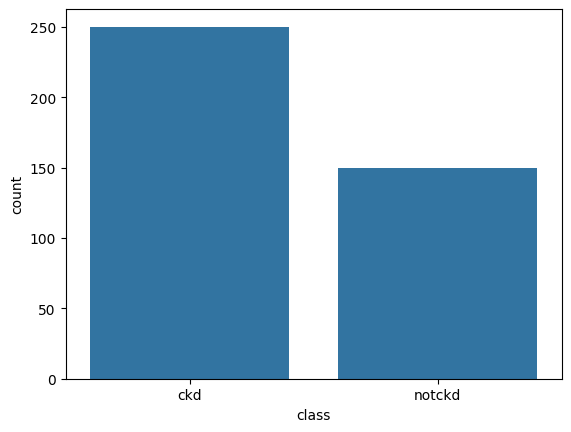

In [ ]:
class_count = df['class'].value_counts()
sns.barplot(class_count)

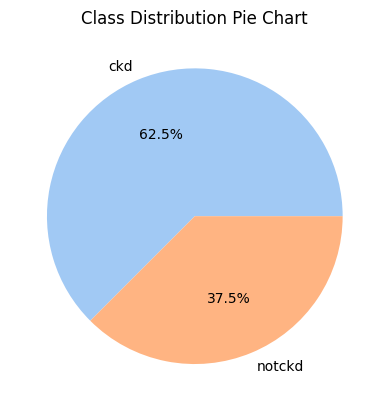

In [ ]:
colors = sns.color_palette('pastel')[0:len(class_count)]  # Adjust length for class count
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', colors=colors)
plt.title("Class Distribution Pie Chart")
sns.despine()  # Remove extra spines from the plot for cleaner visuals
plt.show()

In [ ]:
# Define a dictionary mapping original attribute names to their actual names
attribute_mapping = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'Class'
}

# Rename columns using the dictionary
df.rename(columns=attribute_mapping, inplace=True)

# Print the DataFrame to verify the changes
print(df.head())
df

  Age Blood Pressure Specific Gravity Albumin Sugar Red Blood Cells  Pus Cell  \
0  48             80            1.020       1     0               ?    normal   
1   7             50            1.020       4     0               ?    normal   
2  62             80            1.010       2     3          normal    normal   
3  48             70            1.005       4     0          normal  abnormal   
4  51             80            1.010       2     0          normal    normal   

  Pus Cell Clumps    Bacteria Blood Glucose Random  ... Packed Cell Volume  \
0      notpresent  notpresent                  121  ...                 44   
1      notpresent  notpresent                    ?  ...                 38   
2      notpresent  notpresent                  423  ...                 31   
3         present  notpresent                  117  ...                 32   
4      notpresent  notpresent                  106  ...                 35   

  White Blood Cell Count Red Blood Cell Coun

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.dtypes

Age                        object
Blood Pressure             object
Specific Gravity           object
Albumin                    object
Sugar                      object
Red Blood Cells            object
Pus Cell                   object
Pus Cell Clumps            object
Bacteria                   object
Blood Glucose Random       object
Blood Urea                 object
Serum Creatinine           object
Sodium                     object
Potassium                  object
Hemoglobin                 object
Packed Cell Volume         object
White Blood Cell Count     object
Red Blood Cell Count       object
Hypertension               object
Diabetes Mellitus          object
Coronary Artery Disease    object
Appetite                   object
Pedal Edema                object
Anemia                     object
Class                      object
dtype: object

In [ ]:
# Convert data types according to attribute information
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Blood Pressure'] = pd.to_numeric(df['Blood Pressure'], errors='coerce')
df['Specific Gravity'] = pd.Categorical(df['Specific Gravity'], categories=['1.005', '1.010', '1.015', '1.020', '1.025'])
df['Albumin'] = pd.Categorical(df['Albumin'], categories=['0', '1', '2', '3', '4', '5'])
df['Sugar'] = pd.Categorical(df['Sugar'], categories=['0', '1', '2', '3', '4', '5'])
df['Red Blood Cells'] = pd.Categorical(df['Red Blood Cells'], categories=['normal', 'abnormal'])
df['Pus Cell'] = pd.Categorical(df['Pus Cell'], categories=['normal', 'abnormal'])
df['Pus Cell Clumps'] = pd.Categorical(df['Pus Cell Clumps'], categories=['present', 'notpresent'])
df['Bacteria'] = pd.Categorical(df['Bacteria'], categories=['present', 'notpresent'])
df['Blood Glucose Random'] = pd.to_numeric(df['Blood Glucose Random'], errors='coerce')
df['Blood Urea'] = pd.to_numeric(df['Blood Urea'], errors='coerce')
df['Serum Creatinine'] = pd.to_numeric(df['Serum Creatinine'], errors='coerce')
df['Sodium'] = pd.to_numeric(df['Sodium'], errors='coerce')
df['Potassium'] = pd.to_numeric(df['Potassium'], errors='coerce')
df['Hemoglobin'] = pd.to_numeric(df['Hemoglobin'], errors='coerce')
df['Packed Cell Volume'] = pd.to_numeric(df['Packed Cell Volume'], errors='coerce')
df['White Blood Cell Count'] = pd.to_numeric(df['White Blood Cell Count'], errors='coerce')
df['Red Blood Cell Count'] = pd.to_numeric(df['Red Blood Cell Count'], errors='coerce')
df['Hypertension'] = pd.Categorical(df['Hypertension'], categories=['yes', 'no'])
df['Diabetes Mellitus'] = pd.Categorical(df['Diabetes Mellitus'], categories=['yes', 'no'])
df['Coronary Artery Disease'] = pd.Categorical(df['Coronary Artery Disease'], categories=['yes', 'no'])
df['Appetite'] = pd.Categorical(df['Appetite'], categories=['good', 'poor'])
df['Pedal Edema'] = pd.Categorical(df['Pedal Edema'], categories=['yes', 'no'])
df['Anemia'] = pd.Categorical(df['Anemia'], categories=['yes', 'no'])
df['Class'] = pd.Categorical(df['Class'], categories=['ckd', 'notckd'])

# Print the DataFrame to verify the changes
print(df.head())

    Age  Blood Pressure Specific Gravity Albumin Sugar Red Blood Cells  \
0  48.0            80.0            1.020       1     0             NaN   
1   7.0            50.0            1.020       4     0             NaN   
2  62.0            80.0            1.010       2     3          normal   
3  48.0            70.0            1.005       4     0          normal   
4  51.0            80.0            1.010       2     0          normal   

   Pus Cell Pus Cell Clumps    Bacteria  Blood Glucose Random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                44.0                  7800.0                  

In [ ]:
df.dtypes

Age                         float64
Blood Pressure              float64
Specific Gravity           category
Albumin                    category
Sugar                      category
Red Blood Cells            category
Pus Cell                   category
Pus Cell Clumps            category
Bacteria                   category
Blood Glucose Random        float64
Blood Urea                  float64
Serum Creatinine            float64
Sodium                      float64
Potassium                   float64
Hemoglobin                  float64
Packed Cell Volume          float64
White Blood Cell Count      float64
Red Blood Cell Count        float64
Hypertension               category
Diabetes Mellitus          category
Coronary Artery Disease    category
Appetite                   category
Pedal Edema                category
Anemia                     category
Class                      category
dtype: object

In [ ]:
df.describe()

,Age,Blood Pressure,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
missing_values = df.isnull()
missing_values_rows = missing_values.sum(axis=1)
missing_values_rows

0      3
1      5
2      3
3      0
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Exclude the 'Class' column
target_column = 'Class'
features_df = df.drop(columns=[target_column])

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert categorical variables to numeric using label encoding
categorical_columns = features_df.select_dtypes(include=['category']).columns
for col in categorical_columns:
    features_df[col] = label_encoder.fit_transform(features_df[col])

# Encode the target column as binary
target_values = label_encoder.fit_transform(df[target_column])
target_binary = (target_values == label_encoder.classes_.tolist().index('ckd')).astype(int)  # 1 for 'ckd', 0 for 'notckd'

# Initialize SimpleImputer for handling missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values
features_df = pd.DataFrame(imputer.fit_transform(features_df), columns=features_df.columns)

# Print the DataFrame to verify the changes
print(features_df.head())

# Print the encoded target variable
print(target_binary)

    Age  Blood Pressure  Specific Gravity  Albumin  Sugar  Red Blood Cells  \
0  48.0            80.0               3.0      1.0    0.0              2.0   
1   7.0            50.0               3.0      4.0    0.0              2.0   
2  62.0            80.0               1.0      2.0    3.0              1.0   
3  48.0            70.0               0.0      4.0    0.0              1.0   
4  51.0            80.0               1.0      2.0    0.0              1.0   

   Pus Cell  Pus Cell Clumps  Bacteria  Blood Glucose Random  ...  Hemoglobin  \
0       1.0              0.0       0.0            121.000000  ...        15.4   
1       1.0              0.0       0.0            148.036517  ...        11.3   
2       1.0              0.0       0.0            423.000000  ...         9.6   
3       0.0              1.0       0.0            117.000000  ...        11.2   
4       1.0              0.0       0.0            106.000000  ...        11.6   

   Packed Cell Volume  White Blood Cell Coun

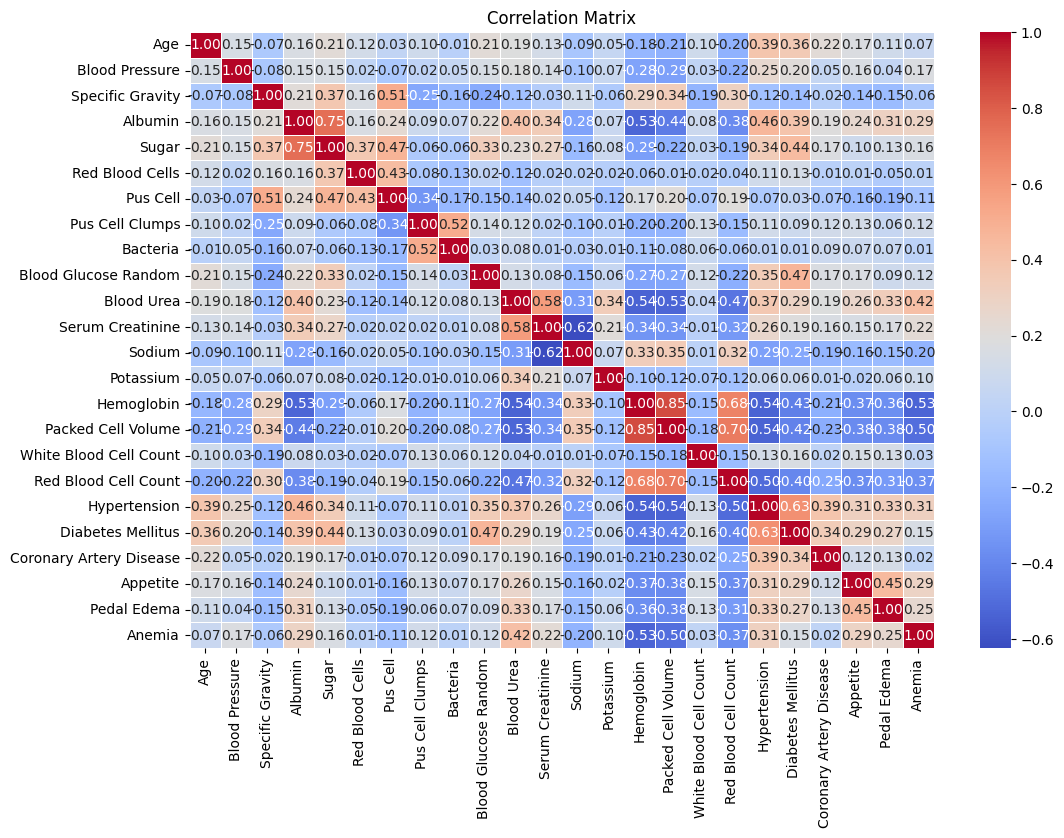

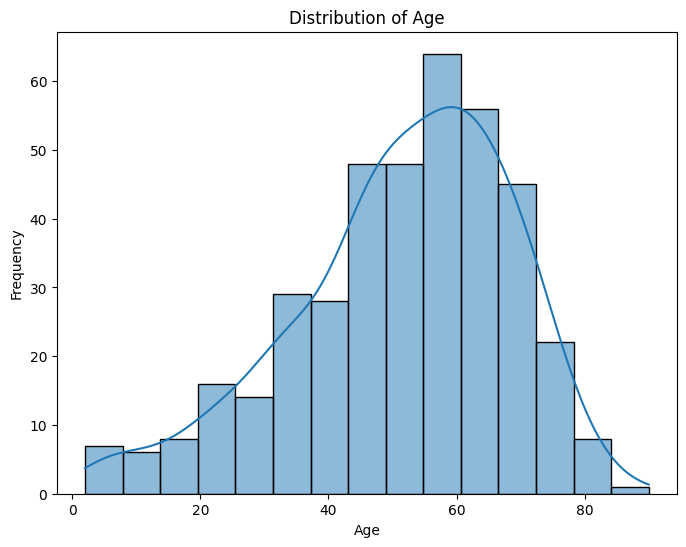

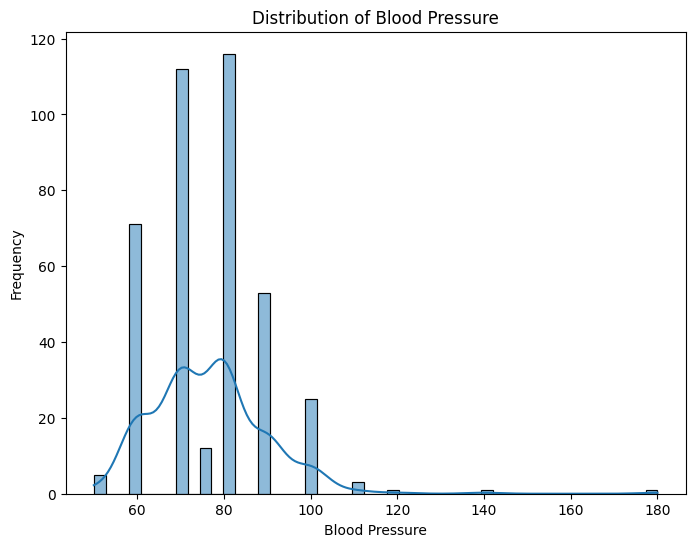

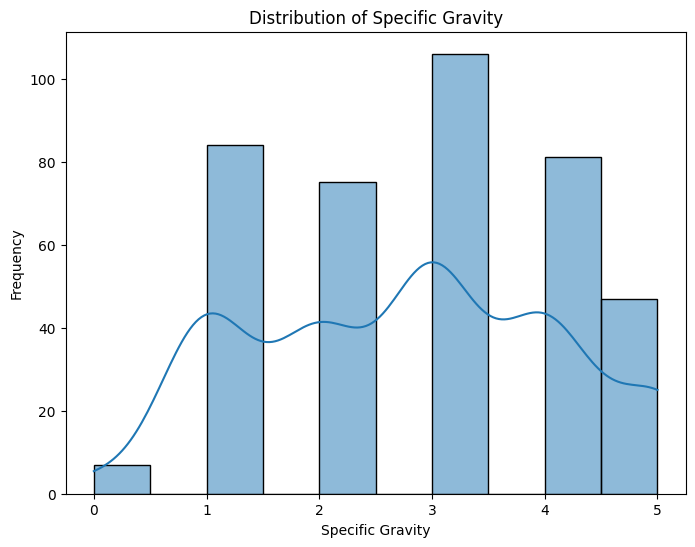

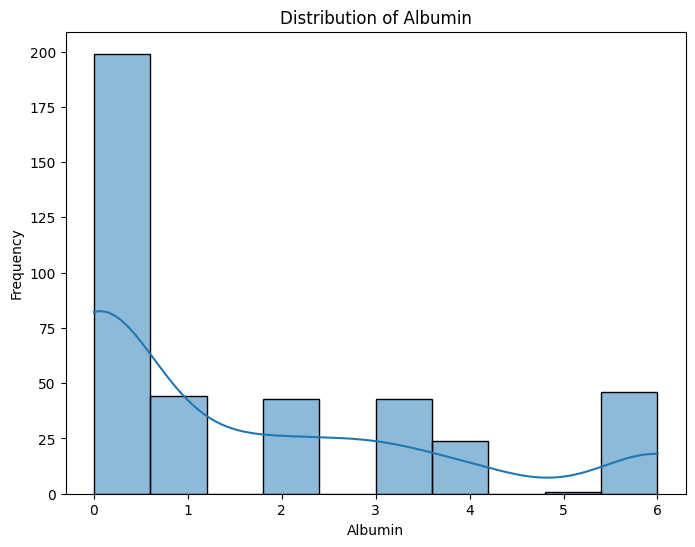

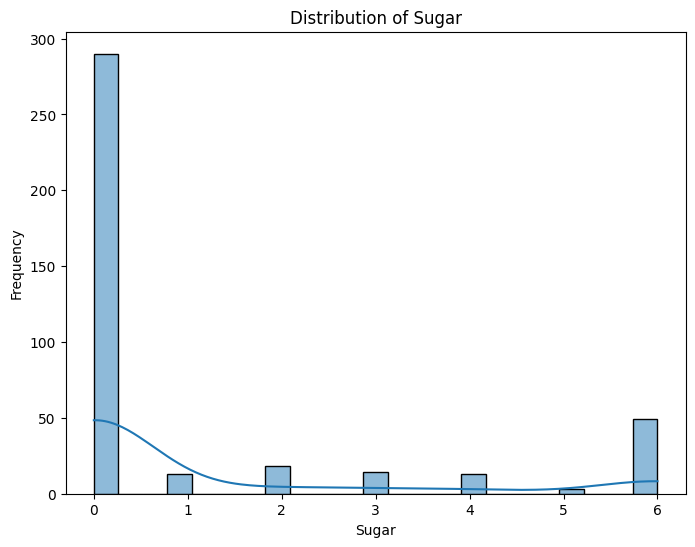

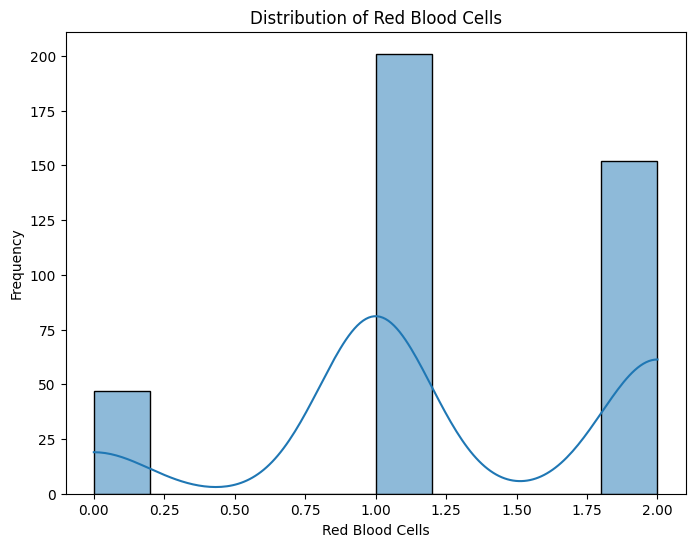

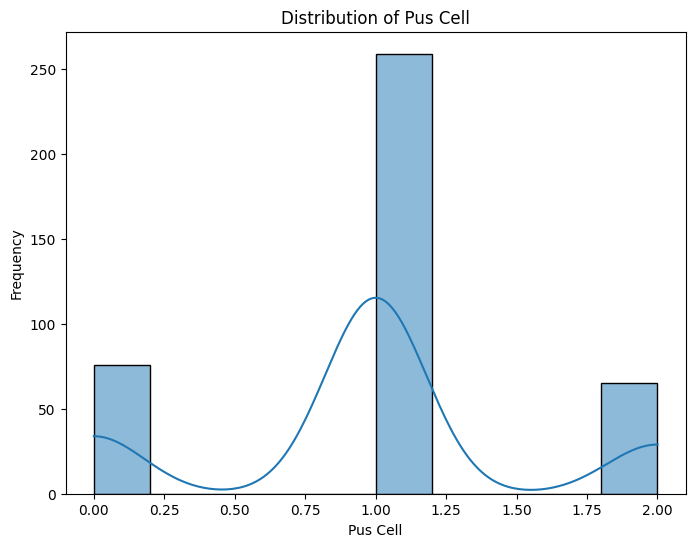

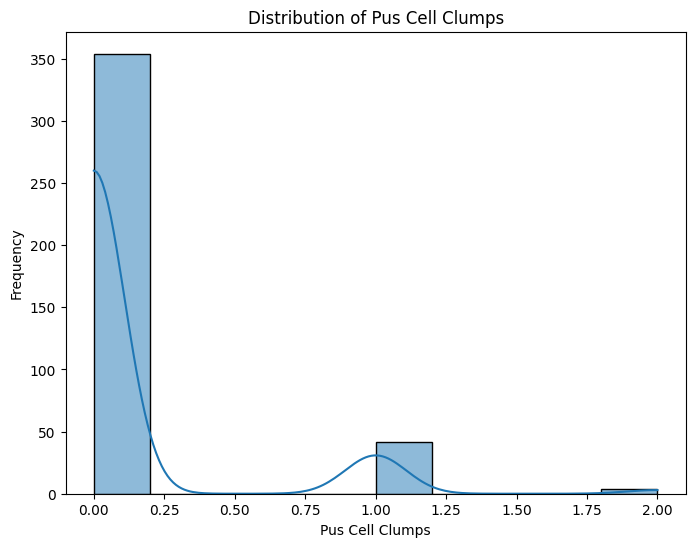

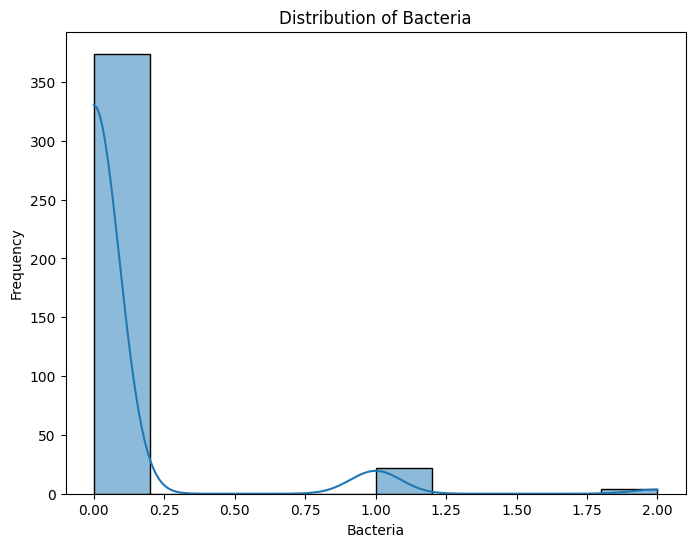

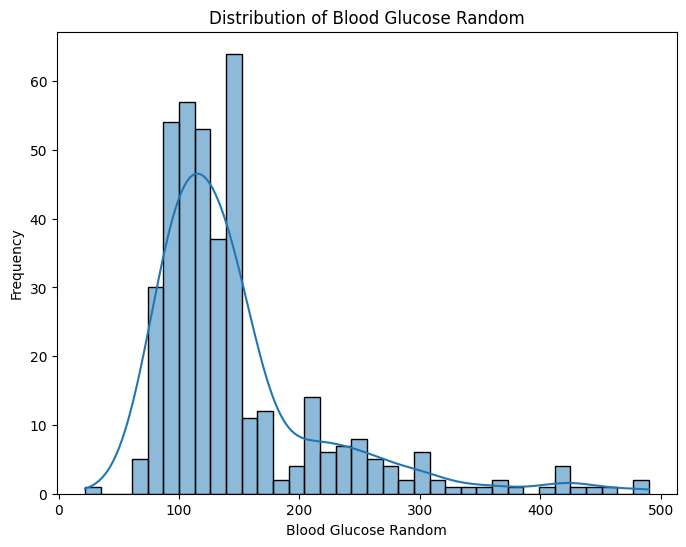

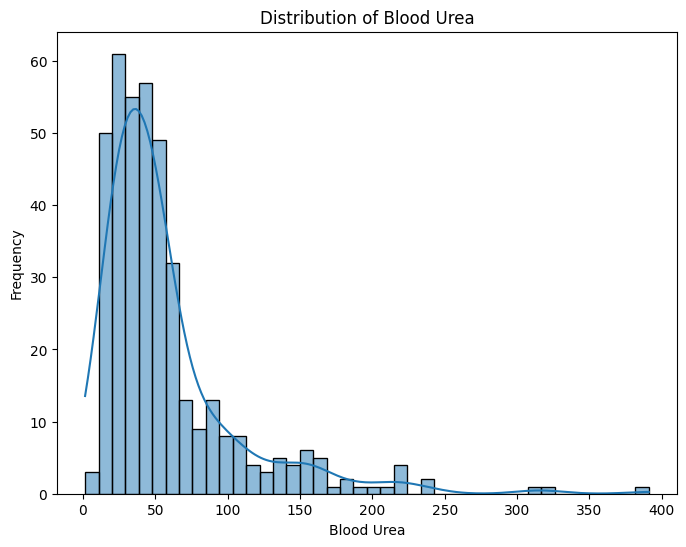

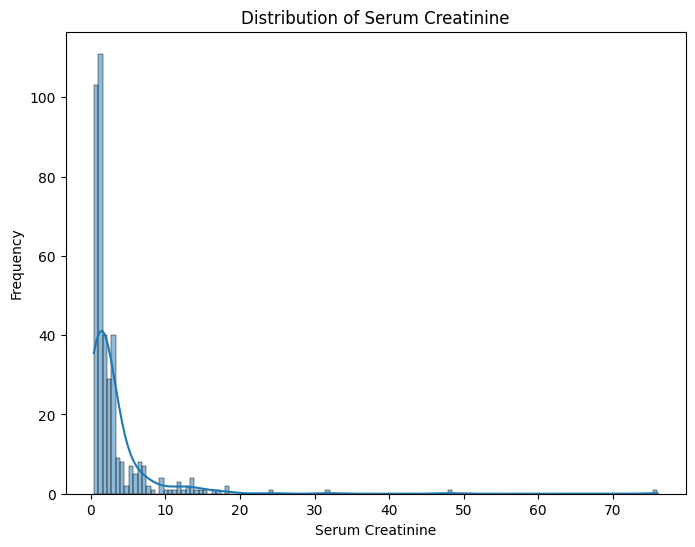

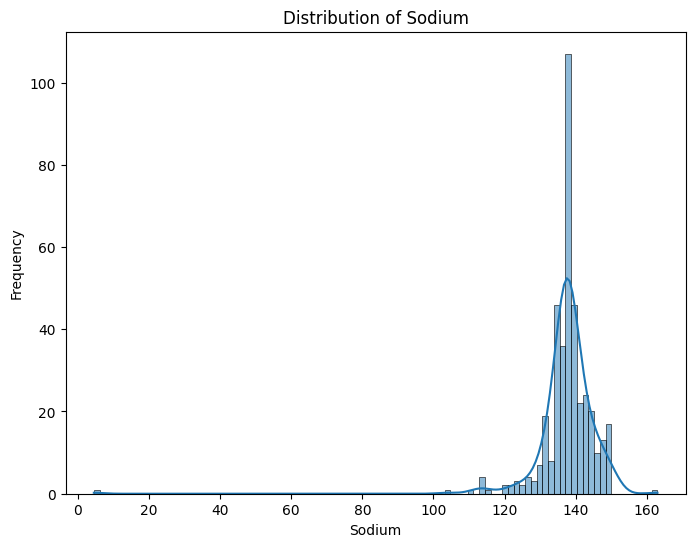

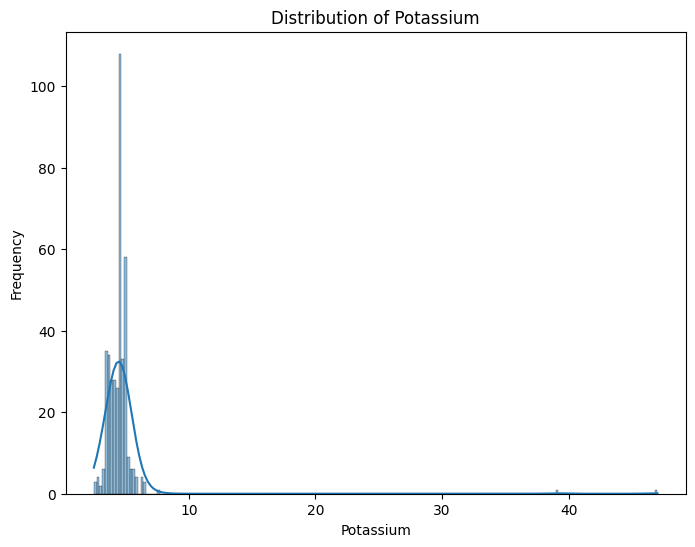

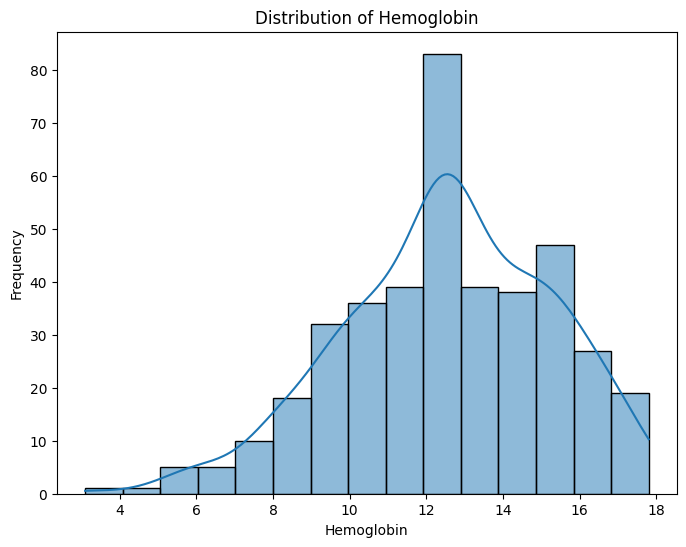

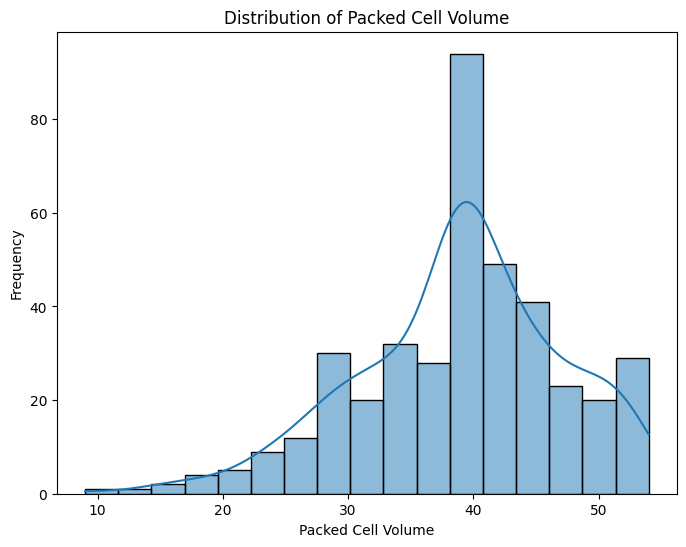

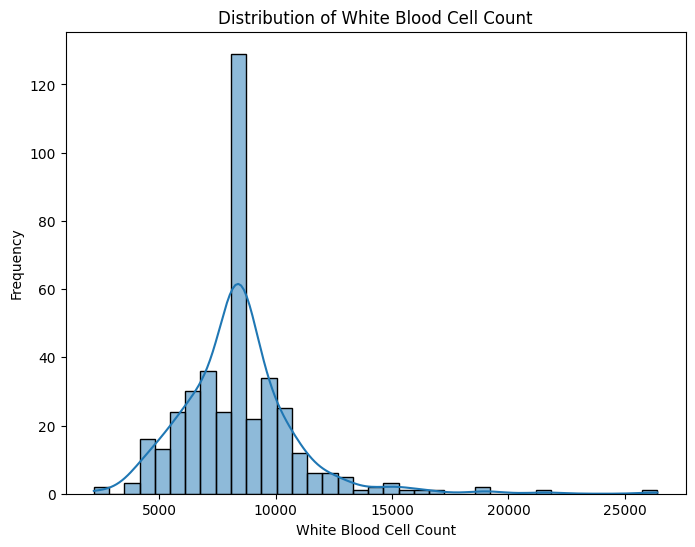

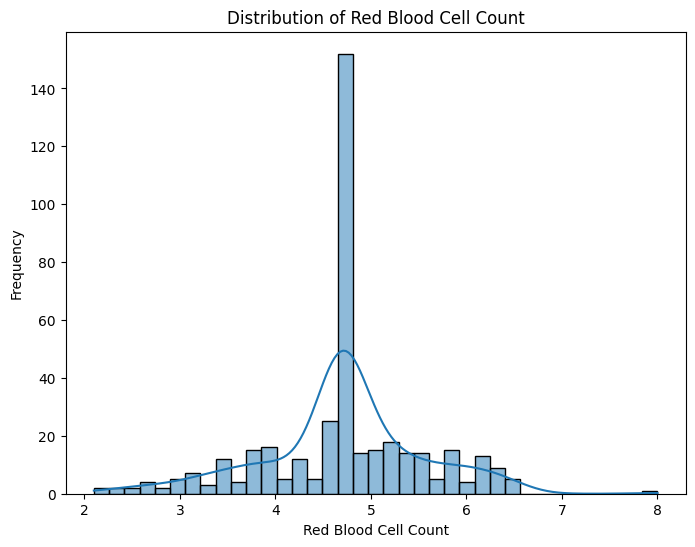

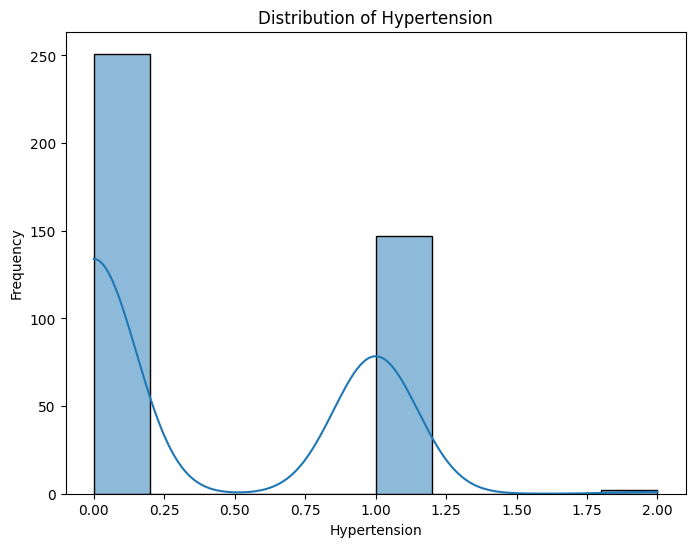

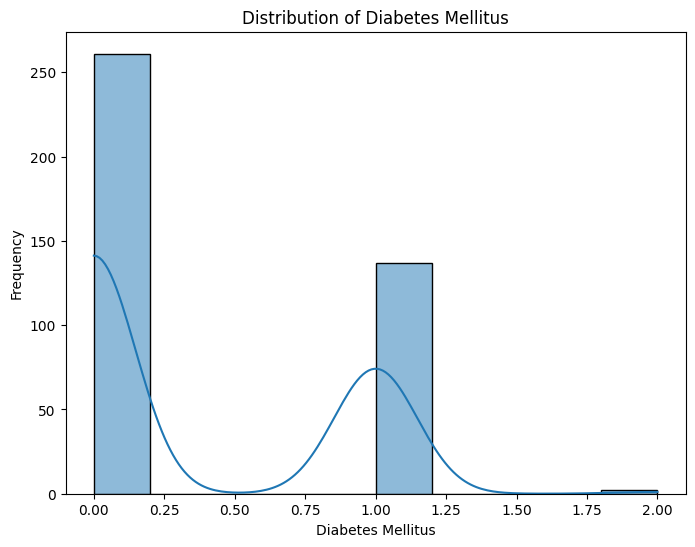

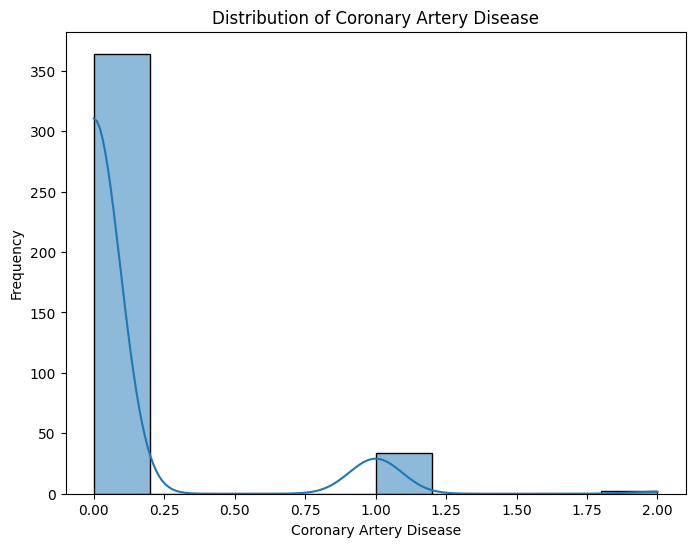

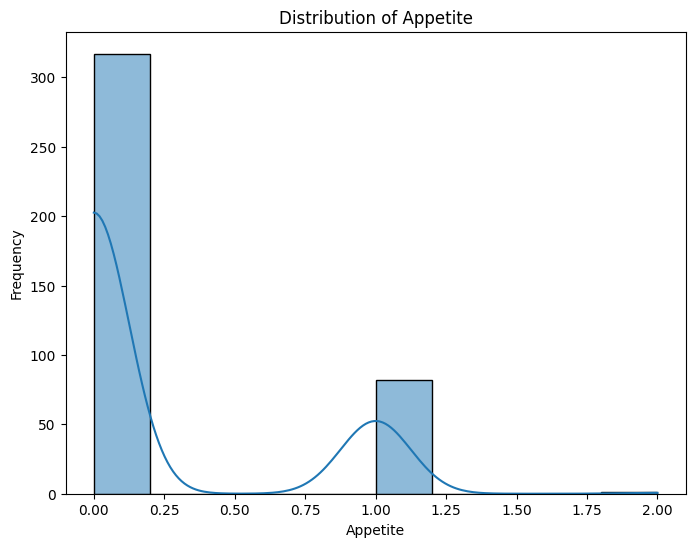

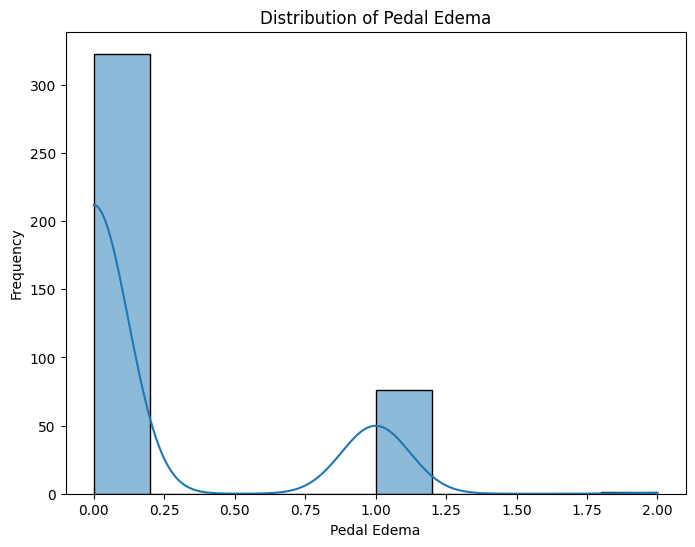

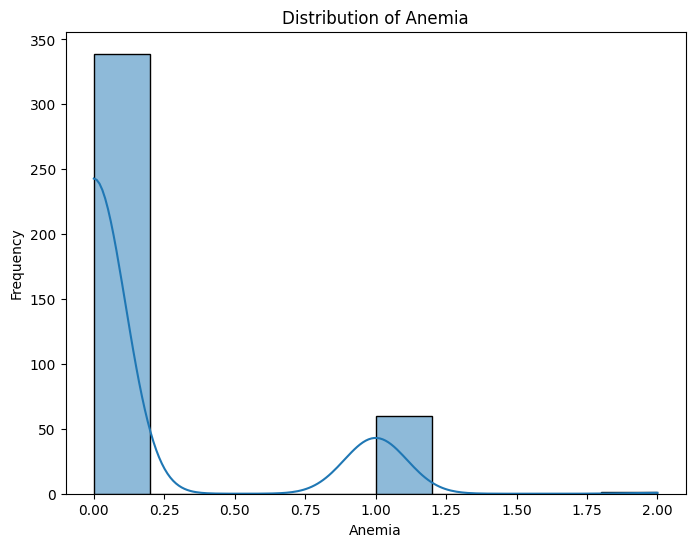

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot distributions of numeric features
numeric_features = features_df.select_dtypes(include=['number']).columns
for col in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(features_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot count plots for categorical features
categorical_features = features_df.select_dtypes(include=['category']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=features_df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the features
standardized_features = scaler.fit_transform(features_df)

# Convert the standardized features back to a DataFrame
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)

# Print the standardized features DataFrame
print(standardized_features_df.head())


        Age  Blood Pressure  Specific Gravity   Albumin     Sugar  \
0 -0.205464        0.262338          0.165475 -0.289903 -0.540670   
1 -2.623810       -1.966580          0.165475  1.184179 -0.540670   
2  0.620313        0.262338         -1.321938  0.201458  0.894737   
3 -0.205464       -0.480635         -2.065645  1.184179 -0.540670   
4 -0.028511        0.262338         -1.321938  0.201458 -0.540670   

   Red Blood Cells  Pus Cell  Pus Cell Clumps  Bacteria  Blood Glucose Random  \
0         1.126521  0.046368        -0.347524 -0.250873             -0.361987   
1         1.126521  0.046368        -0.347524 -0.250873              0.000000   
2        -0.400965  0.046368        -0.347524 -0.250873              3.681441   
3        -0.400965 -1.639745         2.432668 -0.250873             -0.415543   
4        -0.400965  0.046368        -0.347524 -0.250873             -0.562820   

   ...  Hemoglobin  Packed Cell Volume  White Blood Cell Count  \
0  ...    1.059271            0.

                Age  Blood Pressure  Specific Gravity       Albumin  \
count  4.000000e+02    4.000000e+02      4.000000e+02  4.000000e+02   
mean   5.062617e-16    7.815970e-16      1.065814e-16 -3.552714e-17   
std    1.001252e+00    1.001252e+00      1.001252e+00  1.001252e+00   
min   -2.918730e+00   -1.966580e+00     -2.065645e+00 -7.812631e-01   
25%   -5.593680e-01   -4.806345e-01     -5.782318e-01 -7.812631e-01   
50%    1.484407e-01    1.311692e-01      1.654747e-01 -2.899027e-01   
75%    7.382812e-01    2.623384e-01      9.091811e-01  6.928182e-01   
max    2.271867e+00    7.692067e+00      1.652888e+00  2.166900e+00   

              Sugar  Red Blood Cells      Pus Cell  Pus Cell Clumps  \
count  4.000000e+02     4.000000e+02  4.000000e+02     4.000000e+02   
mean   7.105427e-17     1.243450e-16 -5.329071e-17     5.329071e-17   
std    1.001252e+00     1.001252e+00  1.001252e+00     1.001252e+00   
min   -5.406699e-01    -1.928450e+00 -1.639745e+00    -3.475240e-01   
25%  

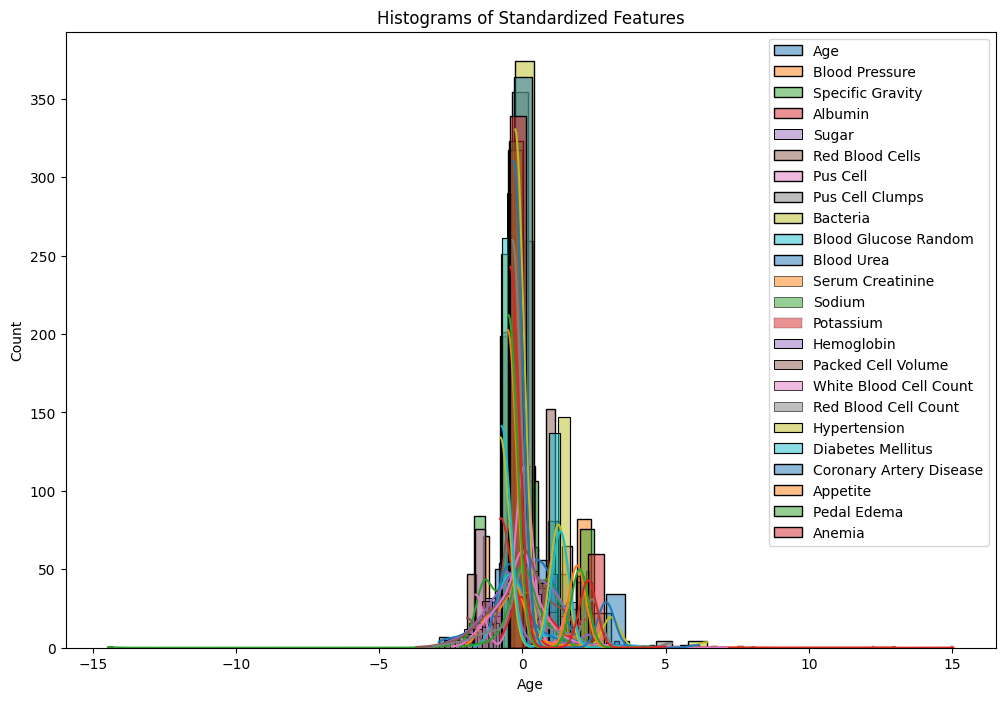

In [ ]:
# Descriptive statistics
print(standardized_features_df.describe())

# Visualization - Example: Histograms
plt.figure(figsize=(12, 8))
for col in standardized_features_df.columns:
    sns.histplot(standardized_features_df[col], kde=True, label=col)
plt.title('Histograms of Standardized Features')
plt.legend()
plt.show()


Explained Variance Ratio: [0.25557017 0.11392128]


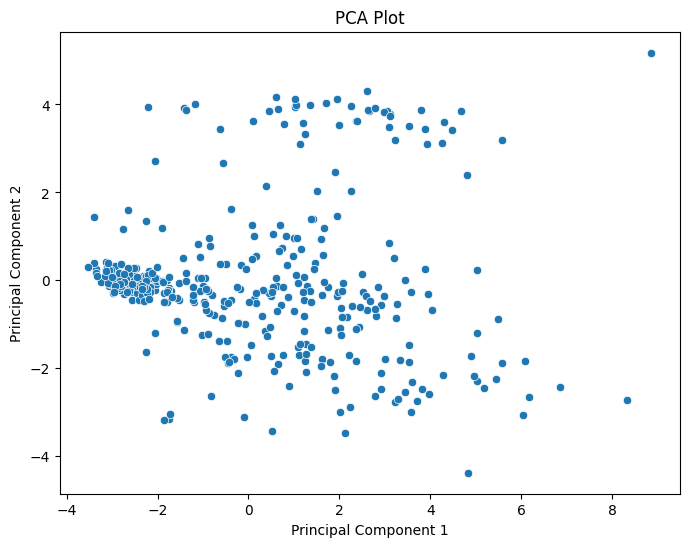

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_features_df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2')
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
principal_df

,PC1,PC2
0,-0.839539,0.791454
1,-1.442755,0.498475
2,2.519595,-0.268734
3,3.213284,-2.762497
4,-0.749979,-0.791696
...,...,...
395,-2.346364,-0.199266
396,-3.532649,0.309502
397,-2.956659,-0.259529
398,-3.004947,0.081174


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_features_df, target_binary, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()
xgboost_model = xgb.XGBClassifier()

# Train models
models = {
    'Logistic Regression': logistic_regression_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model,
    'XGBoost': xgboost_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Trained {name} model.")


Trained Logistic Regression model.
Trained Random Forest model.
Trained SVM model.
Trained XGBoost model.


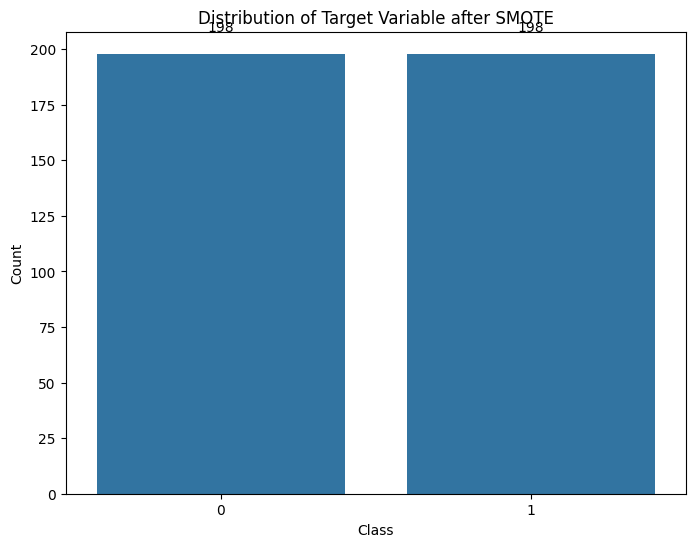

In [ ]:
# Concatenate resampled features and target variable into a single DataFrame
resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Get the counts of each class
class_counts = resampled_df['Class'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='Class')
plt.title('Distribution of Target Variable after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate counts on the plot
for index, value in enumerate(class_counts):
    plt.text(index, value + 10, str(value), ha='center')

plt.show()

In [ ]:
resampled_df

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,-0.205464,-0.480635,-2.065645,1.184179,-0.540670,-0.400965,-1.639745,2.432668,-0.250873,-0.415543,...,-0.845669,-0.677016,-9.620759e-01,1.257656,-0.722185,-0.306651,1.910980,2.000193,2.291539,1
1,0.502345,1.748284,0.909181,-0.781263,0.894737,1.126521,0.046368,-0.347524,-0.250873,1.539227,...,-0.231486,1.188016,-4.854674e-01,1.257656,1.326566,2.921255,-0.507982,-0.484519,-0.420341,1
2,1.564058,-1.223607,1.652888,2.166900,2.330144,1.126521,1.732482,-0.347524,-0.250873,-0.455709,...,-1.828363,0.000000,-1.058283e-15,-0.762675,1.326566,-0.306651,-0.507982,-0.484519,2.291539,1
3,-0.677336,0.262338,0.909181,-0.781263,-0.540670,-0.400965,0.046368,-0.347524,-0.250873,-0.107600,...,1.119719,0.791201,-2.471631e-01,-0.762675,-0.722185,-0.306651,-0.507982,-0.484519,-0.420341,0
4,-1.916001,0.262338,0.165475,-0.781263,-0.540670,-0.400965,0.046368,-0.347524,-0.250873,-0.549431,...,0.628372,0.000000,-1.058283e-15,-0.762675,-0.722185,-0.306651,-0.507982,-0.484519,-0.420341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,-1.525735,0.262338,0.365838,-0.781263,-0.540670,-0.400965,0.046368,-0.347524,-0.250873,-0.776553,...,0.202385,0.771267,1.769171e+00,-0.762675,-0.722185,-0.306651,-0.507982,-0.484519,-0.420341,0
392,0.250623,-0.299256,0.347032,-0.781263,-0.540670,-0.400965,0.046368,-0.347524,-0.250873,-0.470986,...,1.455355,-0.667328,1.659271e+00,-0.762675,-0.722185,-0.306651,-0.507982,-0.484519,-0.420341,0
393,-0.343285,-1.098572,0.909181,-0.781263,-0.540670,-0.400965,0.046368,-0.347524,-0.250873,-0.278797,...,1.324047,-0.735571,3.008429e-02,-0.762675,-0.722185,-0.306651,-0.507982,-0.484519,-0.420341,0
394,0.616615,-0.643170,0.746485,-0.781263,-0.540670,1.126521,1.732482,-0.347524,-0.250873,-0.715110,...,0.424918,0.343535,1.177640e-01,-0.762675,-0.722185,-0.306651,-0.507982,-0.484519,-0.420341,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score, roc_auc_score

# Evaluate models
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix:")
    print(cm)

    # Classification report
    cr = classification_report(y_test, y_pred)
    print(f"\n{name} Classification Report:")
    print(cr)

    # F2-score
    f2_score = fbeta_score(y_test, y_pred, beta=2)
    print(f"\n{name} F2-score: {f2_score:.4f}")

    # AUC
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"\n{name} AUC: {auc_score:.4f}")

    # Sensitivity and Specificity
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"\n{name} Sensitivity: {sensitivity:.4f}")
    print(f"\n{name} Specificity: {specificity:.4f}")



Logistic Regression Confusion Matrix:
[[27  1]
 [ 1 51]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Logistic Regression F2-score: 0.9808

Logistic Regression AUC: 0.9725

Logistic Regression Sensitivity: 0.9808

Logistic Regression Specificity: 0.9643

Random Forest Confusion Matrix:
[[28  0]
 [ 0 52]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80




In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# Train MLP model
mlp_model.fit(X_train, y_train)
print("Trained MLP model.")

# Evaluate MLP model
# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("\nMLP Confusion Matrix:")
print(cm_mlp)

# Classification report
cr_mlp = classification_report(y_test, y_pred_mlp)
print("\nMLP Classification Report:")
print(cr_mlp)

# F2-score
f2_score_mlp = fbeta_score(y_test, y_pred_mlp, beta=2)
print("\nMLP F2-score:", f2_score_mlp)

# AUC
auc_score_mlp = roc_auc_score(y_test, y_pred_mlp)
print("\nMLP AUC:", auc_score_mlp)

# Sensitivity and Specificity
tn_mlp, fp_mlp, fn_mlp, tp_mlp = cm_mlp.ravel()
sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
print("\nMLP Sensitivity:", sensitivity_mlp)
print("\nMLP Specificity:", specificity_mlp)


Trained MLP model.

MLP Confusion Matrix:
[[27  1]
 [ 1 51]]

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


MLP F2-score: 0.9807692307692307

MLP AUC: 0.9725274725274726

MLP Sensitivity: 0.9807692307692307

MLP Specificity: 0.9642857142857143


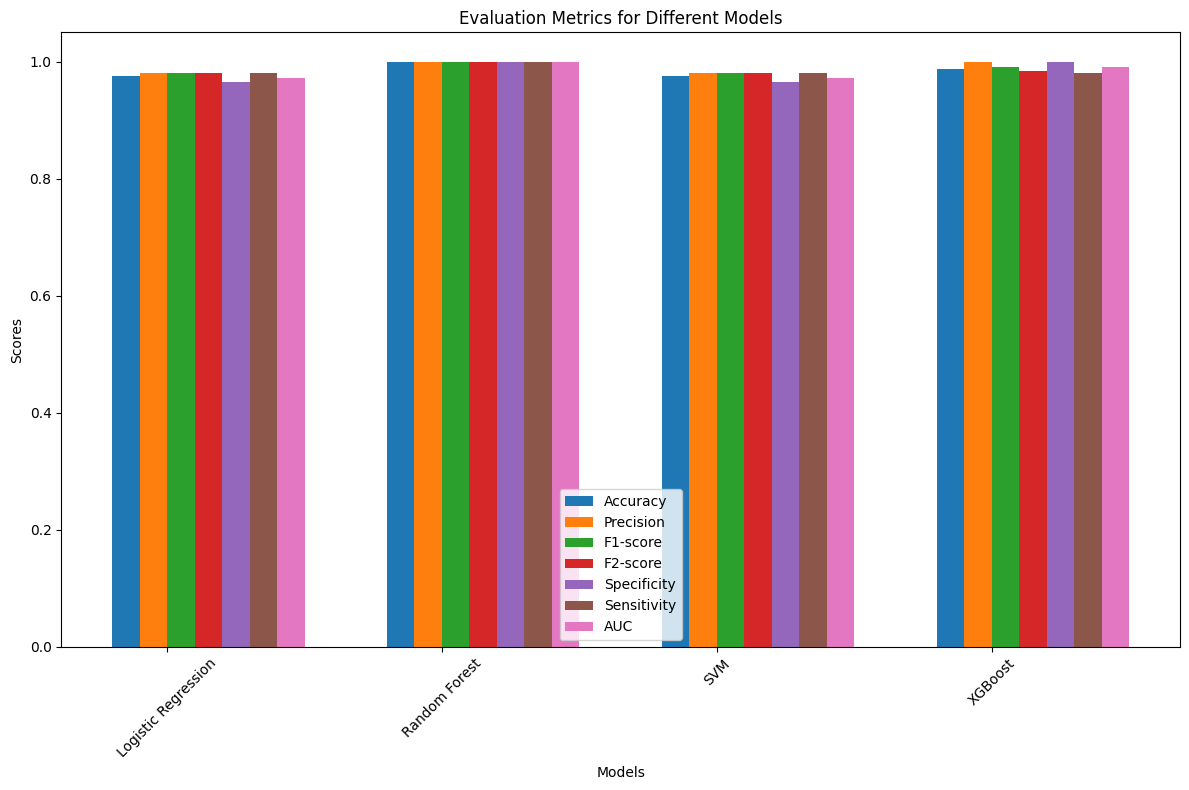

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store metric scores for each model
accuracy_scores = []
precision_scores = []
f1_scores = []
f2_scores = []
specificity_scores = []
sensitivity_scores = []
auc_scores = []

# Calculate metric scores for each model
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    precision_scores.append(precision)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    f1_scores.append(2 * (precision * sensitivity) / (precision + sensitivity))
    f2_scores.append((5 * precision * sensitivity) / (4 * precision + sensitivity))
    auc_scores.append(roc_auc_score(y_test, y_pred))

# Plot evaluation metrics
x = np.arange(len(models))
width = 0.1

plt.figure(figsize=(12, 8))

plt.bar(x - 3*width/2, accuracy_scores, width, label='Accuracy')
plt.bar(x - width/2, precision_scores, width, label='Precision')
plt.bar(x + width/2, f1_scores, width, label='F1-score')
plt.bar(x + 3*width/2, f2_scores, width, label='F2-score')
plt.bar(x + 5*width/2, specificity_scores, width, label='Specificity')
plt.bar(x + 7*width/2, sensitivity_scores, width, label='Sensitivity')
plt.bar(x + 9*width/2, auc_scores, width, label='AUC')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Models')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


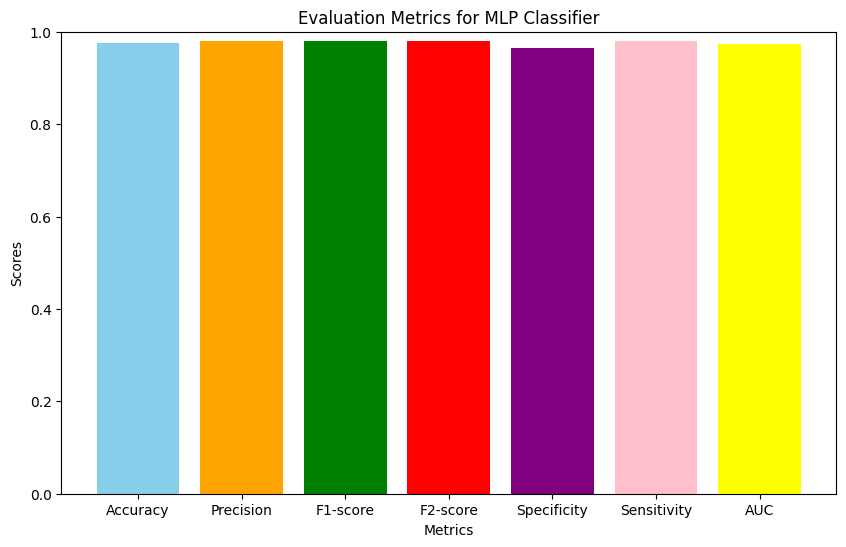

In [ ]:
# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# Train MLP model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Confusion matrix
tn_mlp, fp_mlp, fn_mlp, tp_mlp = confusion_matrix(y_test, y_pred_mlp).ravel()

# Calculate metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = tp_mlp / (tp_mlp + fp_mlp)
sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
f1_score_mlp = 2 * (precision_mlp * sensitivity_mlp) / (precision_mlp + sensitivity_mlp)
f2_score_mlp = (5 * precision_mlp * sensitivity_mlp) / (4 * precision_mlp + sensitivity_mlp)
auc_score_mlp = roc_auc_score(y_test, y_pred_mlp)

# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'F1-score', 'F2-score', 'Specificity', 'Sensitivity', 'AUC']
scores = [accuracy_mlp, precision_mlp, f1_score_mlp, f2_score_mlp, specificity_mlp, sensitivity_mlp, auc_score_mlp]

# Define colors for each metric
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow']

# Plot evaluation metrics with different colors
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=colors)
plt.title('Evaluation Metrics for MLP Classifier')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()



In [ ]:
df.describe()

,Age,Blood Pressure,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000
